<a href="https://colab.research.google.com/github/nixfield/google-colab/blob/master/psta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

tweet_df = pd.read_csv('https://raw.githubusercontent.com/virgantara/sundanese-twitter-dataset/master/newdataset.csv')
tweet_df.head()

,label,data
0,anger,"sok geura leungit atuh sia teh corona, matak g..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ..."


label
joy        637
anger      628
sadness    627
fear       626
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


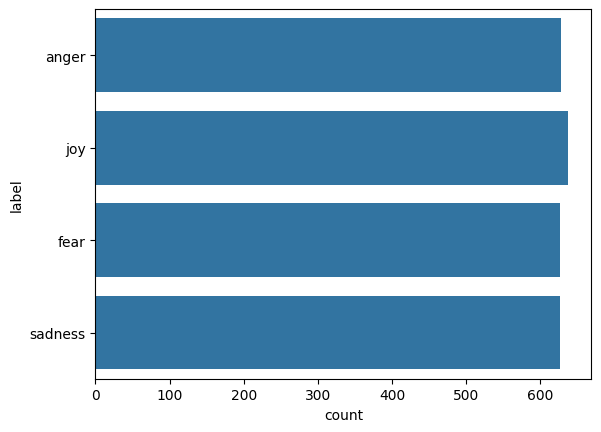

In [2]:
import seaborn as sns
print(tweet_df['label'].value_counts())
print('\n')
print(sns.countplot(tweet_df['label']))

In [3]:
import re
df =tweet_df.copy()

# Case Folding
def caseFolding(data):
    temp_tweet = []
    for tw in data:
        # remove @name(mention)
        tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

        # remove links
        # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
        tw = re.sub(r"http\S+", "", tw)

        # remove new line
        tw = re.sub('\n', '', tw)

        # remove RT
        tw = re.sub('RT', '', tw)

        # remove punctuations and numbers
        tw = re.sub("[^a-zA-Z^']", " ", tw)
        tw = re.sub(" {2,}", " ", tw)

        # remove leading and trailing whitespace
        tw = tw.strip()

        # remove whitespace with a single space
        tw = re.sub(r'\s+', ' ', tw)

        # text to lowercase
        tw = tw.lower();
        temp_tweet.append(tw)
    return temp_tweet

df['Case Folding']=caseFolding(df['data'])
df

,label,data,Case Folding
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...
...,...,...,...
2513,fear,Abi gawe di rs boromeus sararoak kieu:(,abi gawe di rs boromeus sararoak kieu
2514,joy,Abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos tapi abdi seserian ningali si...
2515,joy,Aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah kieu aduh
2516,joy,"Aa kasep hatur nuhun, eneng bingah pisan ningg...",aa kasep hatur nuhun eneng bingah pisan ninggalna


In [4]:
import nltk
from nltk.corpus import stopwords
import requests

nltk.download('stopwords')

def removeStopWords(data):
  stop_words_sunda = requests.get('https://raw.githubusercontent.com/virgantara/sundanese-twitter-dataset/master/stopwordv1.txt').text.splitlines()
  stop_words_id = set(stopwords.words('indonesian'))
  stop_words = stop_words_sunda + list(stop_words_id)
  print(stop_words, '\n')
  print(len(stop_words))
  return data.apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


df['Stopword Removal']=removeStopWords(df['Case Folding'])
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['tapi', 'sanajan', 'salain', 'ti', 'ku', 'kituna', 'sabalikna', 'malah', 'saenggeus', 'kitu', 'boh', 'lain', 'bae', 'duka', 'rek', 'bari', 'lantaran', 'asal', 'dina', 'siga', 'keur', 'saha', 'eukeur', 'wae', 'atuh', 'kawas', 'lamun', 'erek', 'isuk', 'beurang', 'peuting', 'kamari', 'wanci', 'burit', 'tengah', 'teuing', 'apal', 'buleud', 'taneuh', 'kulon', 'wetan', 'kaler', 'kidul', 'keur', 'saha', 'naon', 'mana', 'naha', 'iraha', 'kumaha', 'sabaraha', 'ieu', 'eta', 'dieu', 'kieu', 'jeung', 'sareng', 'nepi', 'jaba', 'lian', 'lamun', 'tapi', 'atawa', 'atanapi', 'tuluy', 'terus', 'teras', 'yen', 'majar', 'nu', 'anu', 'matak', 'majar', 'teh', 'mah', 'seug', 'heug', 'mun', 'ketah', 'ketang', 'pisan', 'sok', 'be', 'wae', 'we', 'weh', 'mung', 'ngan', 'ukur', 'keur', 'nuju', 'masih', 'keneh', 'pikeun', 'kanggo', 'da', 'kapan', 'kapanan', 'apan', 'pan', 'apanan', 'deui', 'deuih', 'ge', 'oge', 'ongkoh', 'nya', 'nyah', 'enya', 'lain', 'sanes', 'abi', 'euy', 'dan', 'na', 'ari', 'sama', 'ka', 'ku',

,label,data,Case Folding,Stopword Removal
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh
...,...,...,...,...
2513,fear,Abi gawe di rs boromeus sararoak kieu:(,abi gawe di rs boromeus sararoak kieu,gawe rs boromeus sararoak
2514,joy,Abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos abdi seserian ningali tetehna...
2515,joy,Aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah
2516,joy,"Aa kasep hatur nuhun, eneng bingah pisan ningg...",aa kasep hatur nuhun eneng bingah pisan ninggalna,aa kasep hatur nuhun eneng bingah ninggalna


In [5]:
nltk.download('punkt')

# tokenizing
def tokenized(data):
  return data.apply(nltk.word_tokenize)

df['Tokenizing']=tokenized(df['Stopword Removal'])
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,data,Case Folding,Stopword Removal,Tokenizing
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...,"[geura, leungit, sia, corona, gelo, yeuh, aing..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna,"[katoel, katuhu, nyerina, kenca, goblog, wasitna]"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...,"[bingah, patepang, pangerasa, sing, katampi, k..."
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan,"[hariwang, lalakon, hirup, nyorangan]"
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh,"[orang, sih, anying, sampis, bunuh, ae, bunuh]"
...,...,...,...,...,...
2513,fear,Abi gawe di rs boromeus sararoak kieu:(,abi gawe di rs boromeus sararoak kieu,gawe rs boromeus sararoak,"[gawe, rs, boromeus, sararoak]"
2514,joy,Abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos abdi seserian ningali tetehna...,"[abdi, teu, ngartos, abdi, seserian, ningali, ..."
2515,joy,Aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah,"[aaaaawww, meuni, bungah]"
2516,joy,"Aa kasep hatur nuhun, eneng bingah pisan ningg...",aa kasep hatur nuhun eneng bingah pisan ninggalna,aa kasep hatur nuhun eneng bingah ninggalna,"[aa, kasep, hatur, nuhun, eneng, bingah, ningg..."


In [6]:
import os

# Buat folder dan file log jika belum ada (diperlukan untuk proses stemmer)
if not os.path.exists("log"):
    os.makedirs("log")
log_file_name = "log.txt"
log_file_path = os.path.join("log", log_file_name)

# download stemmer sunda
!wget https://raw.githubusercontent.com/setiawanirwan/SUSTEM/main/SUSTEM_S.py
!wget https://raw.githubusercontent.com/setiawanirwan/SUSTEM/main/SundaRootWordVer20220216.txt

--2024-07-19 19:49:49--  https://raw.githubusercontent.com/setiawanirwan/SUSTEM/main/SUSTEM_S.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8812 (8.6K) [text/plain]
Saving to: ‘SUSTEM_S.py.1’

SUSTEM_S.py.1       100%[===================>]   8.61K  --.-KB/s    in 0s      

2024-07-19 19:49:49 (70.9 MB/s) - ‘SUSTEM_S.py.1’ saved [8812/8812]

--2024-07-19 19:49:49--  https://raw.githubusercontent.com/setiawanirwan/SUSTEM/main/SundaRootWordVer20220216.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64148 (63K) [text/plain]
S

In [7]:
# !pip install Sastrawi
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# # stemming
# def stemming(data):
#   factory = StemmerFactory()
#   stemmer = factory.create_stemmer()

#   return [stemmer.stem(tweet) for tweet in data]


# df['Stemming'] = df['Tokenizing'].apply(stemming)
# df.head()

from SUSTEM_S import EcsStemmer
stemmer = EcsStemmer()

def stemming(data):
    if isinstance(data, list):
        return [stemmer.stemmWord(tweet) for tweet in data]
    return []

# Terapkan stemming pada subset data
df['Stemmming'] = df['Tokenizing'].apply(stemming)
df

,label,data,Case Folding,Stopword Removal,Tokenizing,Stemmming
0,anger,"sok geura leungit atuh sia teh corona, matak g...",sok geura leungit atuh sia teh corona matak ge...,geura leungit sia corona gelo yeuh aing unggal...,"[geura, leungit, sia, corona, gelo, yeuh, aing...","[geura, leungit, sia, corona, gelo, yeuh, aing..."
1,anger,"Nu katoel katuhu nu nyerina kenca, goblog wasitna",nu katoel katuhu nu nyerina kenca goblog wasitna,katoel katuhu nyerina kenca goblog wasitna,"[katoel, katuhu, nyerina, kenca, goblog, wasitna]","[toel, katuhu, nyeri, kenca, goblog, wasitna]"
2,joy,Bingah pisan patepang sareng pangerasa. Sing k...,bingah pisan patepang sareng pangerasa sing ka...,bingah patepang pangerasa sing katampi kalayan...,"[bingah, patepang, pangerasa, sing, katampi, k...","[bingah, tepang, rasa, sing, tampi, layan, pin..."
3,fear,asa hariwang kieu.. lalakon hirup teh asa nyor...,asa hariwang kieu lalakon hirup teh asa nyoran...,hariwang lalakon hirup nyorangan,"[hariwang, lalakon, hirup, nyorangan]","[hariwang, lakon, hirup, nyorang]"
4,anger,"Orang mana sih anying, sampis pisan. Bunuh ae ...",orang mana sih anying sampis pisan bunuh ae la...,orang sih anying sampis bunuh ae bunuh,"[orang, sih, anying, sampis, bunuh, ae, bunuh]","[orang, sih, anying, sampis, bunuh, ae, bunuh]"
...,...,...,...,...,...,...
2513,fear,Abi gawe di rs boromeus sararoak kieu:(,abi gawe di rs boromeus sararoak kieu,gawe rs boromeus sararoak,"[gawe, rs, boromeus, sararoak]","[gawe, rs, boromeus, sararoak]"
2514,joy,Abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos tapi abdi seserian ningali si...,abdi teu ngartos abdi seserian ningali tetehna...,"[abdi, teu, ngartos, abdi, seserian, ningali, ...","[abdi, teu, artos, abdi, seserian, tingali, te..."
2515,joy,Aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah kieu aduh,aaaaawww meuni bungah,"[aaaaawww, meuni, bungah]","[aaaaawww, meuni, bungah]"
2516,joy,"Aa kasep hatur nuhun, eneng bingah pisan ningg...",aa kasep hatur nuhun eneng bingah pisan ninggalna,aa kasep hatur nuhun eneng bingah ninggalna,"[aa, kasep, hatur, nuhun, eneng, bingah, ningg...","[aa, kasep, hatur, nuhun, eneng, bingah, tinggal]"


In [8]:
!grep -i "stemmed" log/log.txt | head -20

gogoleran = goler stemmed 
katoel = toel stemmed 
nyerina = nyeri stemmed 
patepang = tepang stemmed 
pangerasa = rasa stemmed 
katampi = tampi stemmed 
kalayan = layan stemmed 
midulur = dulur stemmed 
lalakon = lakon stemmed 
nyorangan = nyorang stemmed 
ningal = tingal stemmed 
ningal = tingal stemmed 
ngeclak = clak stemmed 
rumasa = rasa stemmed 
ngungudag = udag stemmed 
reureuhna = reureuh stemmed 
kabayang = bayang stemmed 
nongkrong = tongkrong stemmed 
saminggu = minggu stemmed 
kaluar = luar stemmed 


In [9]:
from sklearn.model_selection import train_test_split

X = df['Stemmming'].values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform([' '.join(tweet) for tweet in X_train])
X_test_tfidf = tfidf.transform([' '.join(tweet) for tweet in X_test])